In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [74]:
ds=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [75]:
ds=pd.DataFrame(data=ds)
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


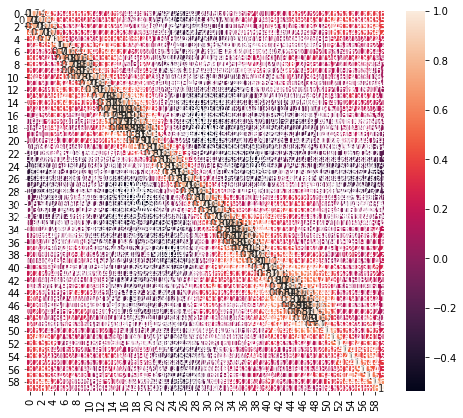

In [76]:
corr_hmap=ds.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show()

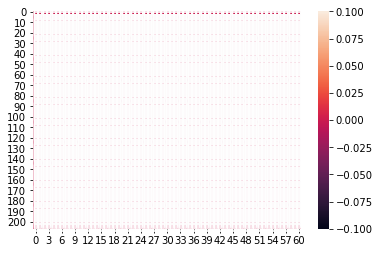

In [77]:
sb.heatmap(ds.isnull(),annot=True)
plt.show()

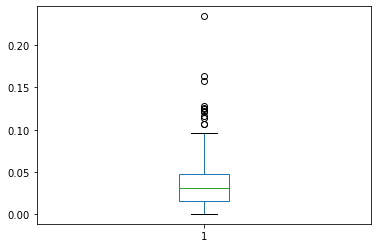

In [78]:
ds[1].plot.box()

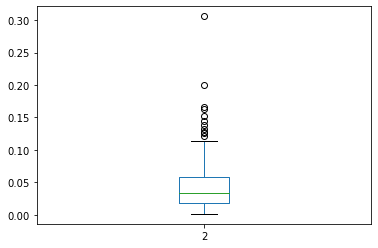

In [79]:
ds[2].plot.box()

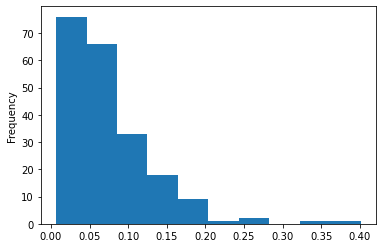

In [80]:
ds[4].plot.hist()

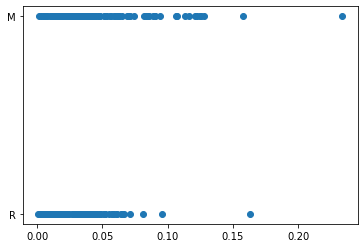

In [81]:
plt.scatter(ds[1],ds[60])

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=[60]
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [83]:
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [84]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(207, 61)
(167, 61)


In [85]:
ds_final.skew()

0     1.252721
1     1.308041
2     1.653128
3     1.229816
4     0.933829
        ...   
56    1.404770
57    1.371583
58    1.472084
59    1.135577
60    0.012085
Length: 61, dtype: float64

In [86]:
import numpy as np
for col in ds_final.columns:
    if ds_final.skew().loc[col]>0.55:
        ds_final[col]=np.log1p(ds_final[col])

In [87]:
ds_final.skew()

0     1.204038
1     1.231669
2     1.539889
3     1.125545
4     0.833268
        ...   
56    1.388491
57    1.356364
58    1.455489
59    1.125086
60    0.012085
Length: 61, dtype: float64

In [88]:
for col in ds_final.columns:
    if ds_final.skew().loc[col]>0.55:
        ds_final[col]=np.sqrt(ds_final[col])

In [89]:
ds_final.skew()

0     0.337380
1     0.245277
2     0.428961
3     0.193177
4     0.137295
        ...   
56    0.489741
57    0.472556
58    0.358919
59    0.431994
60    0.012085
Length: 61, dtype: float64

In [90]:
ds_x=ds_final.drop(columns=[60])
y=ds_final[[60]]

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [92]:
x.skew()

0     0.337380
1     0.245277
2     0.428961
3     0.193177
4     0.137295
5    -0.038422
6     0.359981
7    -0.204862
8     0.020368
9     0.518914
10    0.503509
11    0.467539
12    0.428228
13    0.430889
14    0.459186
15    0.127193
16    0.473461
17    0.540145
18    0.251274
19   -0.087221
20   -0.282408
21   -0.512045
22   -0.648564
23   -0.687917
24   -1.063760
25   -1.052846
26   -0.955804
27   -0.854401
28   -0.573876
29   -0.140695
30    0.264920
31    0.335955
32    0.270804
33    0.418022
34    0.042649
35    0.531996
36    0.545425
37    0.084164
38    0.491648
39    0.445296
40    0.006071
41    0.401422
42    0.413519
43    0.116794
44    0.264263
45   -0.037690
46    0.060661
47   -0.165242
48    0.048610
49    0.007459
50   -0.109592
51    0.374244
52    0.227271
53    0.162536
54    0.456199
55    0.068213
56    0.489741
57    0.472556
58    0.358919
59    0.431994
dtype: float64

In [93]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.sqrt(x[col])

In [94]:
x.skew()

0     0.337380
1     0.245277
2     0.428961
3     0.193177
4     0.137295
5    -0.038422
6     0.359981
7    -0.204862
8     0.020368
9     0.518914
10    0.503509
11    0.467539
12    0.428228
13    0.430889
14    0.459186
15    0.127193
16    0.473461
17    0.540145
18    0.251274
19   -0.087221
20   -0.282408
21   -0.512045
22   -0.648564
23   -0.687917
24   -1.063760
25   -1.052846
26   -0.955804
27   -0.854401
28   -0.573876
29   -0.140695
30    0.264920
31    0.335955
32    0.270804
33    0.418022
34    0.042649
35    0.531996
36    0.545425
37    0.084164
38    0.491648
39    0.445296
40    0.006071
41    0.401422
42    0.413519
43    0.116794
44    0.264263
45   -0.037690
46    0.060661
47   -0.165242
48    0.048610
49    0.007459
50   -0.109592
51    0.374244
52    0.227271
53    0.162536
54    0.456199
55    0.068213
56    0.489741
57    0.472556
58    0.358919
59    0.431994
dtype: float64

In [95]:
import numpy as np
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [96]:
x.skew()

0     0.337380
1     0.245277
2     0.428961
3     0.193177
4     0.137295
5    -0.038422
6     0.359981
7    -0.204862
8     0.020368
9     0.518914
10    0.503509
11    0.467539
12    0.428228
13    0.430889
14    0.459186
15    0.127193
16    0.473461
17    0.540145
18    0.251274
19   -0.087221
20   -0.282408
21   -0.512045
22   -0.648564
23   -0.687917
24   -1.063760
25   -1.052846
26   -0.955804
27   -0.854401
28   -0.573876
29   -0.140695
30    0.264920
31    0.335955
32    0.270804
33    0.418022
34    0.042649
35    0.531996
36    0.545425
37    0.084164
38    0.491648
39    0.445296
40    0.006071
41    0.401422
42    0.413519
43    0.116794
44    0.264263
45   -0.037690
46    0.060661
47   -0.165242
48    0.048610
49    0.007459
50   -0.109592
51    0.374244
52    0.227271
53    0.162536
54    0.456199
55    0.068213
56    0.489741
57    0.472556
58    0.358919
59    0.431994
dtype: float64

In [97]:
from sklearn.preprocessing import power_transform
data = x
print(power_transform(data, method='yeo-johnson'))

[[ 1.42552625  1.07645448  1.62938582 ... -0.09419875 -0.09619923
  -0.13850309]
 [ 2.56739197  1.50194966  0.72102517 ... -0.12345659  0.98709953
   1.08676525]
 [ 0.73863128  2.20862767  2.46141804 ...  1.56432295 -0.56447584
   1.24454488]
 ...
 [ 1.71898784  0.78250831 -0.60096418 ...  1.50310634  0.46447711
  -0.66076983]
 [ 0.6565194   0.45589339  0.74897529 ...  0.60619128 -0.56447584
  -0.00308325]
 [ 0.38532338  0.4973119  -0.91372275 ... -0.51798763  0.12458782
   1.43886103]]


In [98]:
x.skew()

0     0.337380
1     0.245277
2     0.428961
3     0.193177
4     0.137295
5    -0.038422
6     0.359981
7    -0.204862
8     0.020368
9     0.518914
10    0.503509
11    0.467539
12    0.428228
13    0.430889
14    0.459186
15    0.127193
16    0.473461
17    0.540145
18    0.251274
19   -0.087221
20   -0.282408
21   -0.512045
22   -0.648564
23   -0.687917
24   -1.063760
25   -1.052846
26   -0.955804
27   -0.854401
28   -0.573876
29   -0.140695
30    0.264920
31    0.335955
32    0.270804
33    0.418022
34    0.042649
35    0.531996
36    0.545425
37    0.084164
38    0.491648
39    0.445296
40    0.006071
41    0.401422
42    0.413519
43    0.116794
44    0.264263
45   -0.037690
46    0.060661
47   -0.165242
48    0.048610
49    0.007459
50   -0.109592
51    0.374244
52    0.227271
53    0.162536
54    0.456199
55    0.068213
56    0.489741
57    0.472556
58    0.358919
59    0.431994
dtype: float64

In [99]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca

In [100]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,7.947834,2.306928,1.134573,4.452728,0.978413,3.007721,0.820618,-0.593954,2.140773,-1.314865
1,2.500371,1.187561,0.885923,4.508067,1.706419,2.001219,2.703979,1.466571,0.570471,-0.178831
2,2.969979,3.904931,1.750193,0.024671,1.236519,-2.903715,-1.053004,-1.813162,-0.583769,2.896954
3,3.186454,-0.254869,0.290744,-0.552904,-0.018892,-1.876765,3.032155,0.234063,0.959299,-0.024260
4,0.645613,-0.202622,0.794749,-1.525960,-3.026195,-1.613188,0.877477,0.542098,-0.894614,2.230487
...,...,...,...,...,...,...,...,...,...,...
162,0.276387,-0.918380,-3.143403,2.842029,1.232783,-2.276682,-2.507954,1.143797,-1.134787,0.761814
163,-1.630417,-2.674175,-2.158701,2.625666,1.545463,-0.631793,-0.999488,0.660189,0.080484,0.790075
164,-1.680378,-2.034736,-2.279921,3.352993,1.011420,-1.179967,-2.216940,2.179734,-0.095055,1.339252
165,-0.771274,-2.875186,-2.813976,1.940549,0.393360,-0.884662,-0.207698,1.200682,0.376770,1.302249


In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    classi=DecisionTreeClassifier()
    classi.fit(x_train,y_train)
    y_pred=classi.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 87 is 0.6458333333333333


In [131]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8235294117647058
[[14  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.82      0.82      0.82        17

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34



Accuracy score of GaussianNB() is:
0.7941176470588235
[[15  2]
 [ 5 12]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.86      0.71      0.77        17

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80      0.79      0.79        34



Accuracy score of SVC() is:
0.8529411764705882
[[16  1]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1 

In [132]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8235294117647058
[[14  3]
 [ 3 14]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.82      0.82      0.82        17

    accuracy                           0.82        34
   macro avg       0.82      0.82      0.82        34
weighted avg       0.82      0.82      0.82        34



In [137]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8529411764705882
[[16  1]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.93      0.76      0.84        17

    accuracy                           0.85        34
   macro avg       0.86      0.85      0.85        34
weighted avg       0.86      0.85      0.85        34



# Ensemble techniques

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=87)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9117647058823529
[[16  1]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.88      0.91        17

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



In [139]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7352941176470589
[[14  3]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.79      0.65      0.71        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.73        34
weighted avg       0.74      0.74      0.73        34



In [140]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7352941176470589
[[14  3]
 [ 6 11]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.79      0.65      0.71        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.73        34
weighted avg       0.74      0.74      0.73        34



In [141]:
from sklearn.svm import SVC
svc=SVC()

ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5
[[17  0]
 [17  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        17
           1       0.00      0.00      0.00        17

    accuracy                           0.50        34
   macro avg       0.25      0.50      0.33        34
weighted avg       0.25      0.50      0.33        34



In [109]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [110]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [111]:
y_pred_prob

array([6.30248028e-01, 1.59455948e-02, 3.56780755e-01, 2.06544851e-03,
       9.76741779e-01, 9.50910175e-01, 9.31589277e-01, 9.67238126e-01,
       6.86796715e-02, 7.18852285e-01, 5.75796204e-01, 7.21468742e-01,
       9.74343991e-01, 8.50305590e-02, 2.87498574e-01, 1.98519465e-02,
       1.27078132e-01, 2.28937794e-01, 9.89550472e-01, 3.75469593e-01,
       9.71102157e-04, 9.99798175e-01, 5.69078039e-01, 9.49066894e-01,
       8.40940005e-02, 9.00017849e-03, 9.35635398e-01, 1.26976578e-01,
       2.31293608e-01, 9.40950068e-01, 8.33962486e-01, 9.70597261e-01,
       2.04620131e-01, 1.33142261e-01])

In [112]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [113]:
fpr

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 0.17647059, 0.17647059, 0.41176471,
       0.41176471, 0.70588235, 0.70588235, 1.        ])

In [114]:
tpr

array([0.        , 0.05882353, 0.23529412, 0.23529412, 0.29411765,
       0.29411765, 0.64705882, 0.64705882, 0.82352941, 0.82352941,
       0.94117647, 0.94117647, 1.        , 1.        ])

In [115]:
thresholds

array([1.99979818e+00, 9.99798175e-01, 9.74343991e-01, 9.70597261e-01,
       9.67238126e-01, 9.50910175e-01, 7.21468742e-01, 7.18852285e-01,
       5.69078039e-01, 2.31293608e-01, 2.04620131e-01, 8.40940005e-02,
       6.86796715e-02, 9.71102157e-04])

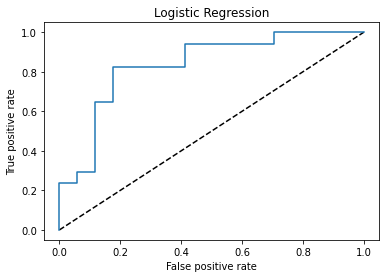

In [116]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [117]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [118]:
print(auc_score)

0.8235294117647058


In [119]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV
ds=pd.read_csv("sonar.csv")
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [120]:
accuracy=clf.best_score_

In [121]:
accuracy

0.8492877492877492

In [122]:
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [123]:
sv=svm.SVC(kernel='rbf',C=10)
sv.fit(x_train,y_train)

SVC(C=10)

In [124]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t=rf.predict(testvalue)
    print(t)

In [125]:
testv=np.array([7.49,1.1,-2.2,-3.4,1.8,5.7,4.3,-1.2,-3.2,1.4])
predicttest(testv)

[0]


In [126]:
import joblib
joblib.dump(rf,'rf_sonar.pkl')

['rf_sonar.pkl']